<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/labs/03112025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pylab as plt

In [6]:
dfgrouped=pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv",index_col=0)

In [7]:
dfgrouped.head()

,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742


In [8]:
dfgrouped.tail()

,Volume
Date,
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615
2015-01-01,4791.695273
2015-01-02,1651.384036


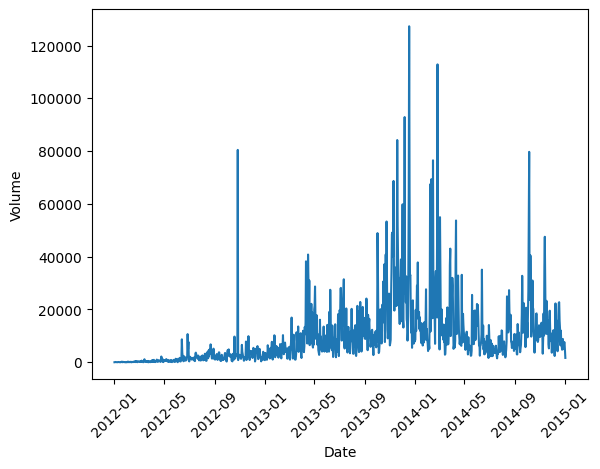

In [15]:
plt.plot(dfgrouped.index,dfgrouped['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [14]:
dfgrouped.index=pd.to_datetime(dfgrouped.index)

In [16]:
dfshort=dfgrouped.iloc[200:500]

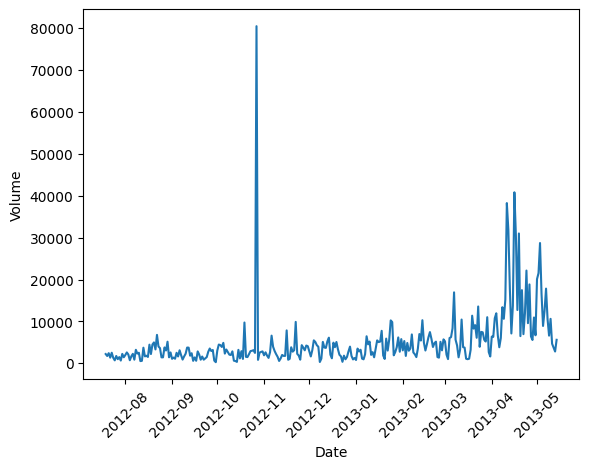

In [19]:
plt.plot(dfshort.index,dfshort['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [20]:
rollingobject=dfshort.rolling(window=20,center=True)

In [22]:
m=rollingobject.mean()
s=rollingobject.std()

<Axes: xlabel='Date'>

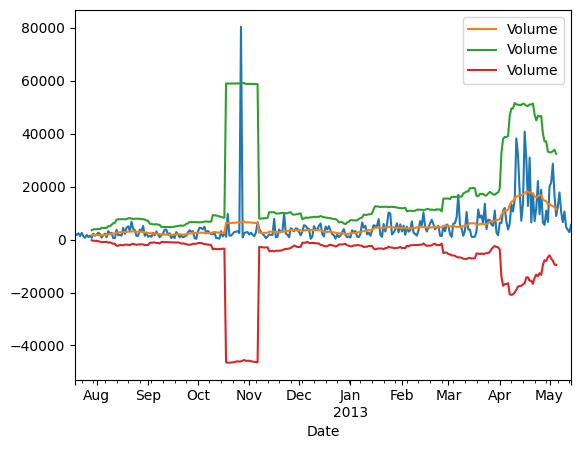

In [26]:
ax=dfshort['Volume'].plot()
m.plot(ax=ax)
(m + 3*s).plot(ax=ax)
(m - 3*s).plot(ax=ax)

In [27]:
import numpy as np


In [29]:
np.where((dfshort['Volume'] < (m['Volume'] - 3*s['Volume'])) + (dfshort['Volume']>(m['Volume'] + 3*s['Volume'])))

(array([100, 231]),)

In [36]:
m1=dfshort['Volume'].rolling(window=11, center=True).apply(lambda x:np.mean(np.concatenate([x[:10],x[11:]])))
s1=dfshort['Volume'].rolling(window=11, center=True).apply(lambda x:np.std(np.concatenate([x[:10],x[11:]])))

<Axes: xlabel='Date'>

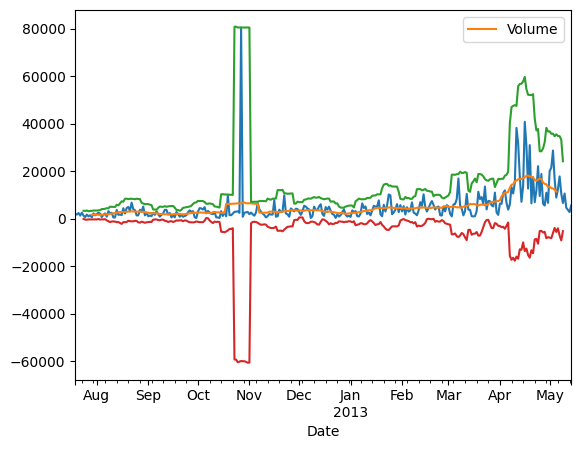

In [37]:
ax=dfshort['Volume'].plot()
m.plot(ax=ax)
(m1 + 3*s1).plot(ax=ax)
(m1- 3*s1).plot(ax=ax)